### Just following along a Youtube tutorial trying to get more exposure with Pytorch. 

In [3]:
#just Import the packages we need for now

import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
# Download the data we need for now. 

dataset = MNIST(root = 'data/',download = True )

In [6]:
# Check how many entries we have. 

len(dataset)

60000

In [7]:
# Let us break off a test dataset from the dataset we have.

test_dataset = MNIST(root = 'data/',train = False)
len(test_dataset)

10000

In [8]:
# We want to view our images, so import matplotlib 

import matplotlib.pyplot as plt
%matplotlib inline 

label: 5


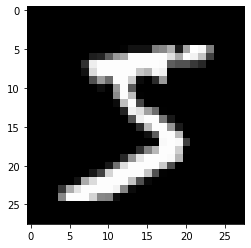

In [9]:
# Look at an entry in our dataset, and it's associated label.

image, label = dataset[0]
plt.imshow(image,cmap='gray')
print('label:',label)

In [10]:
#Let us transform the images into tensors for pytroch to work on. 

import torchvision.transforms as transforms 

In [11]:
# Now let us convert the training dataset into tensors. 

dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor()) 

In [12]:
# Let us examine the converted tensor image shape. 1 is color channel (Gray), 2 and 3 is height and width for pixals. 

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
# IF we wanted to locate various high and low values within the image the following code would do that for us. 

print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


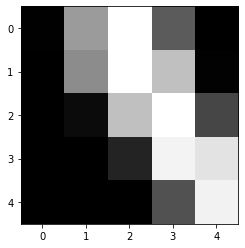

In [14]:
# Let us now plot the image of the following tensor image cross section.

plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [30]:
# Here we will start to create a train, test, and validation set for future model training and testing.

from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)


(50000, 10000)

In [31]:
# Now we will randomize the dataset so we don't get stuck with a bunch of similar numbers for each batch. 

from torch.utils.data import DataLoader 

batch_size = 128

train_loader = DataLoader(train_ds,batch_size,shuffle = True)
val_loader = DataLoader(val_ds,batch_size)

### We will use logistic regression for our model. 

In [32]:
# We need to flatten the image first. Import nn package 

import torch.nn as nn
input_size = 28*28
num_classes = 10 

Model = nn.Linear(input_size,num_classes)

In [33]:
# Let us look at the weights and bias

print(Model.weight.shape)
Model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0289,  0.0092, -0.0290,  ...,  0.0354,  0.0036,  0.0070],
        [-0.0034,  0.0356,  0.0161,  ...,  0.0143,  0.0099,  0.0253],
        [-0.0303, -0.0180, -0.0329,  ...,  0.0353,  0.0262, -0.0142],
        ...,
        [-0.0315,  0.0093, -0.0222,  ...,  0.0235,  0.0292,  0.0301],
        [ 0.0159,  0.0243, -0.0234,  ..., -0.0348, -0.0183, -0.0163],
        [-0.0195,  0.0136,  0.0041,  ..., -0.0157, -0.0041, -0.0117]],
       requires_grad=True)

In [34]:
# Let us look at the weights and bias

print(Model.bias.shape)
Model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0325,  0.0292,  0.0045, -0.0262, -0.0178, -0.0089, -0.0169,  0.0178,
        -0.0188,  0.0221], requires_grad=True)

In [41]:
# Here we will just create a class to flatten out the data for the model to work. 

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear = nn.Linear(input_size,num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1, 784)
        out = self.Linear(xb)
        return out 
    
model = MnistModel()

In [45]:
model.Linear

Linear(in_features=784, out_features=10, bias=True)

In [48]:
# Now let us print out some information from our created model from the class.

print(model.Linear.weight.shape,model.Linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0007,  0.0031,  0.0037,  ...,  0.0265, -0.0239,  0.0237],
         [-0.0011,  0.0097,  0.0126,  ...,  0.0169, -0.0050, -0.0250],
         [ 0.0039, -0.0327, -0.0073,  ..., -0.0340, -0.0197,  0.0052],
         ...,
         [-0.0066, -0.0180,  0.0145,  ...,  0.0351, -0.0348,  0.0266],
         [ 0.0141, -0.0236, -0.0323,  ...,  0.0013,  0.0304,  0.0198],
         [ 0.0240, -0.0356,  0.0006,  ...,  0.0350,  0.0180,  0.0353]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0132, -0.0052,  0.0187,  0.0136, -0.0252,  0.0242, -0.0190, -0.0308,
         -0.0031, -0.0107], requires_grad=True)]

In [49]:
# Let us use our model now. Print out the first two outputs. 

for images, labels in train_loader:
    outputs = model(images)
    break
    
print('output shape :', outputs.shape)
print('sample outputs : \n :', outputs[:2].data)

output shape : torch.Size([128, 10])
sample outputs : 
 : tensor([[ 0.0524,  0.3169,  0.3648,  0.0910, -0.0055, -0.2780,  0.1775, -0.0957,
         -0.1245, -0.0408],
        [-0.0562,  0.1824,  0.1581,  0.2738, -0.1112, -0.0265,  0.3341, -0.2273,
         -0.1517,  0.0331]])
